In [1]:
import pandas as pd
import numpy as np
import seaborn as sns             #import necessary libraries                      

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#load the dataset

In [3]:
sns.set(style = "whitegrid")

In [4]:
df.info()
#gather initial info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head(5)
#check the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


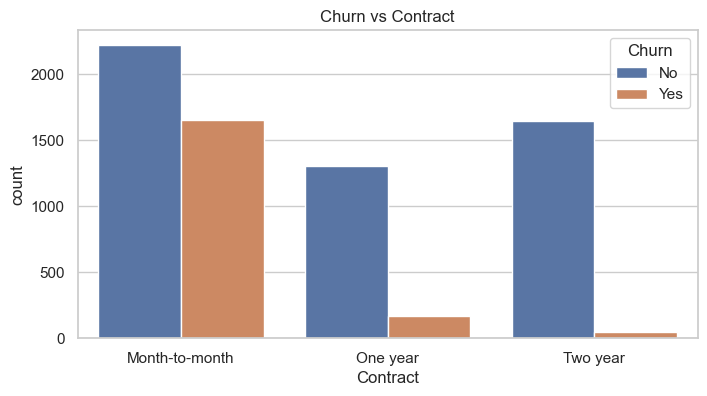

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))                               #countplot between churn and contract
sns.countplot(x="Contract", hue="Churn", data = df)
plt.title("Churn vs Contract")
plt.show()

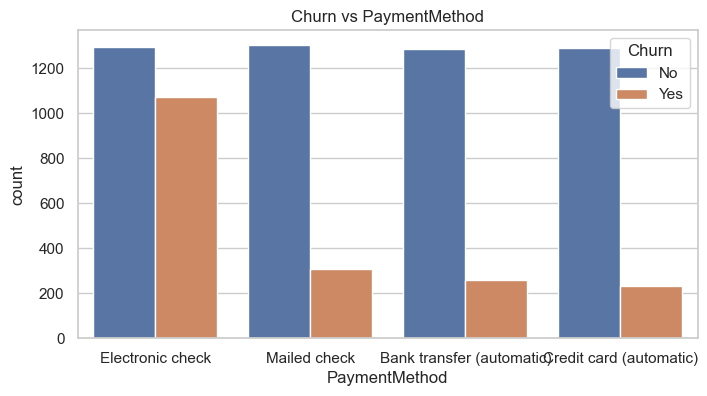

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x="PaymentMethod", hue="Churn", data = df)  #countplot between Churn and Payment method
plt.title("Churn vs PaymentMethod")
plt.show()

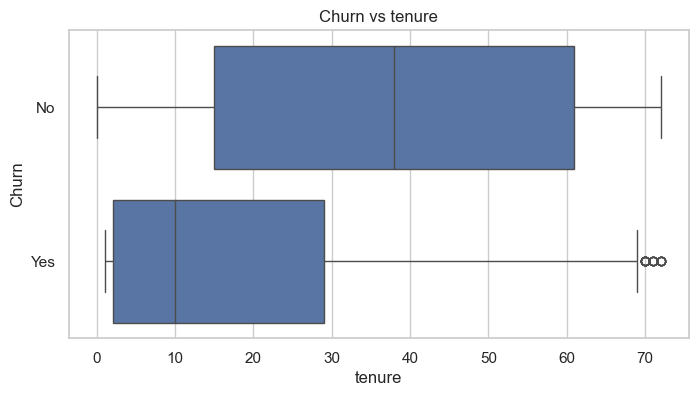

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(x="tenure", y="Churn", data = df) #boxplot to know how tenure effects Churn
plt.title("Churn vs tenure")
plt.show()

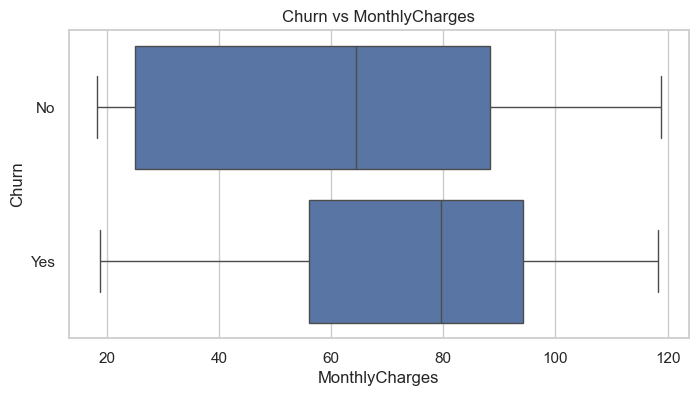

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x="MonthlyCharges", y="Churn", data = df)   #Boxplot to know how Monthly charges effect Churn
plt.title("Churn vs MonthlyCharges")
plt.show()

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce') #convert Total charges to numeric datatype

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #fill null values in Total charges with median

C:\Users\Rambabu Busi\AppData\Local\Temp\ipykernel_15684\3267044958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #fill null values in Total charges with median


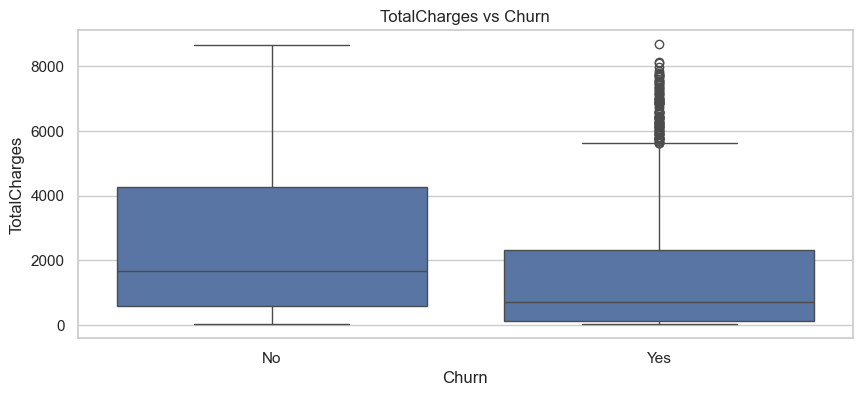

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(y="TotalCharges", x="Churn", data=df) #boxplot TotalCharges vs Churn
plt.title("TotalCharges vs Churn")
plt.show()

In [13]:
df.drop(columns=['customerID'], inplace=True) #drop costomerID as it is redundant

In [14]:
def treat_outlier(x):                #function to treat outliers
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * (iqr)
    upper_bound = q3 + 1.5 * (iqr)
    return lower_bound, upper_bound

In [15]:
lb , ub = treat_outlier(df['TotalCharges'])  #find outliers in Total charges
print(lb,ub)

-4674.3375 8863.1625


In [16]:
df['TotalCharges'] = df['TotalCharges'].clip(lower =lb, upper = ub)  #treat outliers in TotalCharges

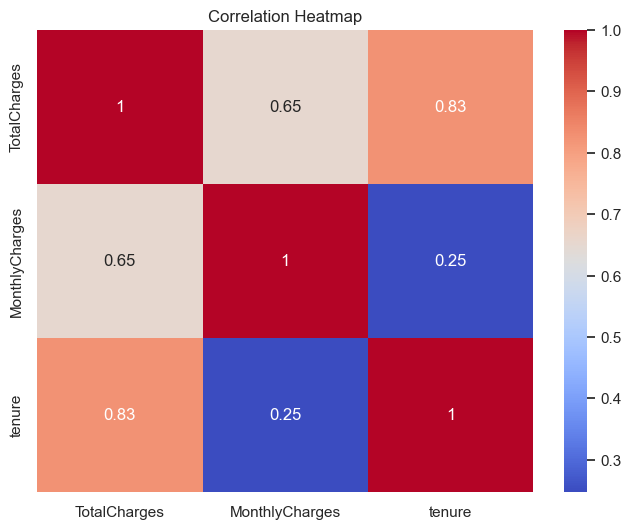

In [17]:
corr = df[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()   #heatmap to find multicolineafrity between numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
df = pd.get_dummies(df, drop_first= True, dtype=int) #encoding

In [19]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [20]:
df.head(5) #quickview of data after encoding

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [189]:
X = df.drop(columns=["Churn_Yes"]) #select dependent features
y = df["Churn_Yes"]                #select target feature

#### Logistic Regression Classifier

In [79]:
from sklearn.preprocessing import StandardScaler       #scaling of the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)

In [80]:
from sklearn.model_selection import train_test_split    #split the data in to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


In [82]:
from sklearn.model_selection import GridSearchCV   #initialize grid search to find best parameters
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=5000)
param_grid = {
    'penalty':['l1', 'l2'],             #regularization type
    'C':[0.01, 0.1, 1, 10],             #inverse of regularization strength
    'class_weight':[None, 'balanced']   #handle imbalance
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best parameters:", grid_search.best_params_)
print("Best ROC_AUC Score:", grid_search.best_score_)

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best ROC_AUC Score: 0.8409994587530836


In [83]:
best_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=5000, penalty='l2', C=10, class_weight=None)
best_model.fit(X_train,y_train)                #fit the LR model with best parameters and predict test data
y_pred=best_model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print("roc_auc_score:", roc_auc_score(y_pred,y_test))                #print ROC_AUC score for the predicted data using best parameters

roc_auc_score: 0.7710032997667408


In [85]:
print(confusion_matrix(y_pred,y_test))  #print confusion matrix

[[933 152]
 [103 221]]


In [86]:
print(classification_report(y_pred,y_test))  #print classification report

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1085
           1       0.59      0.68      0.63       324

    accuracy                           0.82      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.83      0.82      0.82      1409



In [87]:
feature_importance = pd.DataFrame({"Features": X.columns,
                                   "Co-efficient": best_model.coef_[0]})                     #identify and sort feature importance
feature_importance = feature_importance.sort_values(by = "Co-efficient", ascending = False)
print(feature_importance)

                                 Features  Co-efficient
10            InternetService_Fiber optic      0.982613
3                            TotalCharges      0.687462
23                    StreamingMovies_Yes      0.370717
21                        StreamingTV_Yes      0.320650
9                       MultipleLines_Yes      0.240451
26                   PaperlessBilling_Yes      0.163316
28         PaymentMethod_Electronic check      0.151885
17                   DeviceProtection_Yes      0.096417
0                           SeniorCitizen      0.059187
7                        PhoneService_Yes      0.050388
5                             Partner_Yes      0.028056
15                       OnlineBackup_Yes      0.024067
29             PaymentMethod_Mailed check     -0.014166
4                             gender_Male     -0.025274
27  PaymentMethod_Credit card (automatic)     -0.034886
8          MultipleLines_No phone service     -0.050388
19                        TechSupport_Yes     -0

##### Proba

In [88]:
y_proba = best_model.predict_proba(X_test)[:,1]
y_pred_new = (y_proba>=0.4).astype(int)

In [89]:
print("ROC_AUC_score:", roc_auc_score(y_pred_new,y_test))

ROC_AUC_score: 0.742341602619922


In [90]:
print(confusion_matrix(y_pred_new,y_test))

[[863 113]
 [173 260]]


In [91]:
print(classification_report(y_pred_new,y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       976
           1       0.70      0.60      0.65       433

    accuracy                           0.80      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.79      0.80      0.79      1409



#### Random Forest

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


In [191]:
from sklearn.ensemble import RandomForestClassifier          
from sklearn.model_selection import RandomizedSearchCV       #initialize random search cv to find best parameters
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': np.arange(100, 501, 50),     #number of trees
    'max_depth': [None, 5, 10, 20, 30],          #depth of tree
    'min_samples_split': np.arange(2, 11),       #minimum samples to split
    'min_samples_leaf': np.arange(1,5),          #minimum samples at leaf
    'max_features': ['sqrt', 'log2']             #features considered
}
random_search_rfc = RandomizedSearchCV(
    estimator=rfc,
    n_iter=30,                                   #number of random combinations
    param_distributions=param_grid,               
    cv=3,                                        #number of folds
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
random_search_rfc.fit(X_train,y_train)
print("Best parameters:", random_search_rfc.best_params_)
print("Best ROC_AUC score:", random_search_rfc.best_score_)

Best parameters: {'n_estimators': np.int64(400), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(3), 'max_features': 'sqrt', 'max_depth': 10}
Best ROC_AUC score: 0.8415842027658115


In [192]:
best_params=random_search_rfc.best_params_               #fit the data to Random forest classifier with best parameters and predict the test data
best_rfc = RandomForestClassifier(random_state=42,
                                  **best_params
                                 )
best_rfc.fit(X_train,y_train)
y_pred = best_rfc.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print("ROC_AUC_score:", roc_auc_score(y_pred,y_test))                            #print ROC_AUC score

ROC_AUC_score: 0.7729358962159419


In [194]:
print(confusion_matrix(y_pred, y_test))  #print confusion matrix

[[953 177]
 [ 83 196]]


In [195]:
print(classification_report(y_pred, y_test))  #print classification report

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1130
           1       0.53      0.70      0.60       279

    accuracy                           0.82      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.84      0.82      0.82      1409



In [196]:
feature_importance = pd.DataFrame({"Features": X.columns,
                                   "importance": best_rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by = "importance", ascending = False)
print(feature_importance)                                            #find and sort feature importance

                                 Features  importance
1                                  tenure    0.191900
3                            TotalCharges    0.165093
2                          MonthlyCharges    0.110332
10            InternetService_Fiber optic    0.073914
25                      Contract_Two year    0.069395
28         PaymentMethod_Electronic check    0.061492
13                     OnlineSecurity_Yes    0.035486
24                      Contract_One year    0.033427
19                        TechSupport_Yes    0.025500
26                   PaperlessBilling_Yes    0.020232
15                       OnlineBackup_Yes    0.015522
18        TechSupport_No internet service    0.013478
16   DeviceProtection_No internet service    0.013438
9                       MultipleLines_Yes    0.013375
23                    StreamingMovies_Yes    0.012455
4                             gender_Male    0.012346
6                          Dependents_Yes    0.012310
5                           

In [197]:
y_proba = best_rfc.predict_proba(X_test)[:,1]
y_pred_new = (y_proba>=0.4).astype(int)

In [203]:
print(roc_auc_score(y_pred_new, y_test))
print(confusion_matrix(y_pred_new, y_test))
print(classification_report(y_pred_new, y_test))

0.7516130865039253
[[885 122]
 [151 251]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1007
           1       0.67      0.62      0.65       402

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.80      0.81      0.80      1409



<Figure size 1000x600 with 0 Axes>

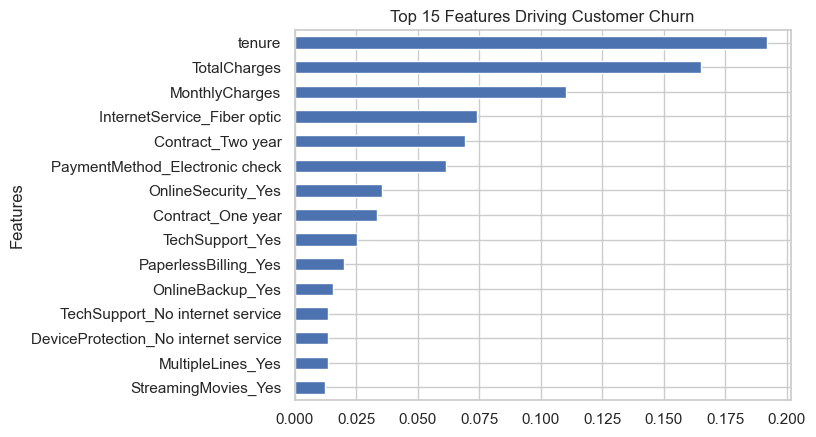

In [202]:
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='barh', x='Features', y='importance', legend=False)
plt.title("Top 15 Features Driving Customer Churn")
plt.gca().invert_yaxis()
plt.show()

#### XGB Classifier

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


In [158]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV    #initialize random search cv to find best parameters
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
param_dist = {
    'n_estimators': np.arange(100,501,50),      #number of boosting rounds
    'max_depth': np.arange(3,11),               #depth of tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    #step size for learning tree
    'sub_sample': [0.6, 0.8, 1],                #row sampling
    'colsample_bytree': [0.6, 0.8, 1],          #feature sampling
    'gamma': [0, 0.1, 0.2, 0.5],                #min loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],             #L1 regularization
    'reg_lambda': [0.1, 1, 10]                  #L2 regularization
}
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,                                  # number of random combinations
    cv=3,                                       #number of folds
    scoring='roc_auc',
    n_jobs= -1,
    random_state=42
)
random_search_xgb.fit(X_train, y_train)
print("Best parameters:", random_search_xgb.best_params_)
print("Best ROC_AUC_score:", random_search_xgb.best_score_)

C:\Newfolder\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:55:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'sub_sample': 1, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': np.int64(350), 'max_depth': np.int64(5), 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Best ROC_AUC_score: 0.8444669175305181


In [159]:
best_params = random_search_xgb.best_params_
best_xgb = XGBClassifier(
    use_label_encoder=False,                       #fit the data to XGB classifier with best parameters and predict test data
    eval_metric = 'logloss',
    random_state=42,
    **best_params
)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

C:\Newfolder\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:02:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [160]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print("ROC_AUC_Score:" , roc_auc_score(y_pred,y_test))  #print ROC_AUC score

ROC_AUC_Score: 0.761406514222256


In [161]:
print(confusion_matrix(y_pred,y_test))  #print confusion matrix

[[947 181]
 [ 89 192]]


In [162]:
print(classification_report(y_pred,y_test))  #print classification report

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1128
           1       0.51      0.68      0.59       281

    accuracy                           0.81      1409
   macro avg       0.71      0.76      0.73      1409
weighted avg       0.83      0.81      0.82      1409



In [163]:
feature_importance = pd.DataFrame({"Features": X.columns,
                                   "importance": best_xgb.feature_importances_})
feature_importance = feature_importance.sort_values( by = "importance", ascending=False)
print(feature_importance)                                         #find and sort feature importance

                                 Features  importance
25                      Contract_Two year    0.227679
10            InternetService_Fiber optic    0.115059
16   DeviceProtection_No internet service    0.099257
24                      Contract_One year    0.085516
28         PaymentMethod_Electronic check    0.065618
12     OnlineSecurity_No internet service    0.046545
20        StreamingTV_No internet service    0.046147
1                                  tenure    0.043452
11                     InternetService_No    0.039294
23                    StreamingMovies_Yes    0.024017
13                     OnlineSecurity_Yes    0.021772
14       OnlineBackup_No internet service    0.019805
19                        TechSupport_Yes    0.018596
26                   PaperlessBilling_Yes    0.017294
3                            TotalCharges    0.016342
8          MultipleLines_No phone service    0.015100
7                        PhoneService_Yes    0.014644
2                          M

In [164]:
y_proba = best_xgb.predict_proba(X_test)[:,1]
y_pred_new = (y_proba>=0.4).astype(int)

In [166]:
print(roc_auc_score(y_pred_new, y_test))
print(confusion_matrix(y_pred_new, y_test))
print(classification_report(y_pred_new, y_test))

0.7698853960048887
[[900 116]
 [136 257]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1016
           1       0.69      0.65      0.67       393

    accuracy                           0.82      1409
   macro avg       0.78      0.77      0.77      1409
weighted avg       0.82      0.82      0.82      1409



<Figure size 1000x600 with 0 Axes>

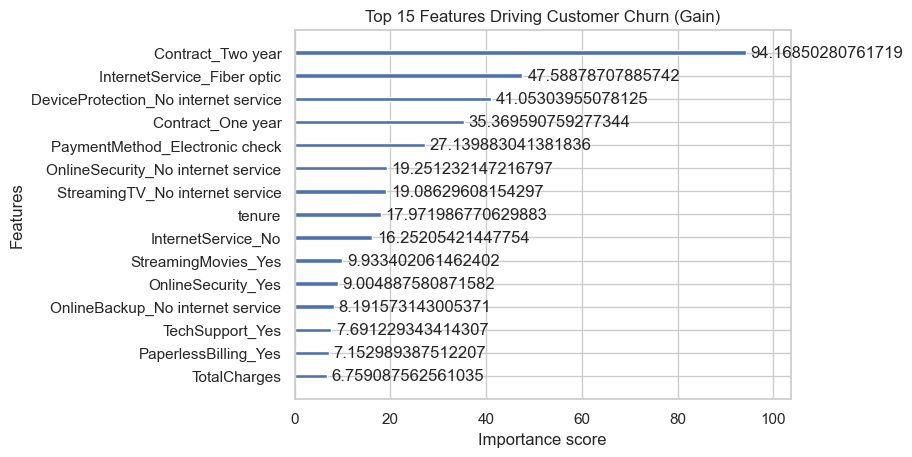

In [167]:
from xgboost import plot_importance

# Plot feature importance by gain
plt.figure(figsize=(10,6))
plot_importance(best_xgb, importance_type='gain', max_num_features=15)
plt.title("Top 15 Features Driving Customer Churn (Gain)")
plt.show()

In [21]:
feature_columns = ['Contract_Two year', 'InternetService_Fiber optic', 'DeviceProtection_No internet service', 'Contract_One year', 'PaymentMethod_Electronic check', 'tenure', 'TotalCharges', 'MonthlyCharges']
X = df[feature_columns]
y = df['Churn_Yes']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 8)
(1409, 8)
(5634,)
(1409,)


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV    #initialize random search cv to find best parameters
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
param_dist = {
    'n_estimators': np.arange(100,501,50),      #number of boosting rounds
    'max_depth': np.arange(3,11),               #depth of tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    #step size for learning tree
    'sub_sample': [0.6, 0.8, 1],                #row sampling
    'colsample_bytree': [0.6, 0.8, 1],          #feature sampling
    'gamma': [0, 0.1, 0.2, 0.5],                #min loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],             #L1 regularization
    'reg_lambda': [0.1, 1, 10]                  #L2 regularization
}
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,                                  # number of random combinations
    cv=3,                                       #number of folds
    scoring='roc_auc',
    n_jobs= -1,
    random_state=42
)
random_search_xgb.fit(X_train, y_train)
print("Best parameters:", random_search_xgb.best_params_)
print("Best ROC_AUC_score:", random_search_xgb.best_score_)

C:\Newfolder\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:48:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'sub_sample': 1, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': np.int64(500), 'max_depth': np.int64(4), 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1}
Best ROC_AUC_score: 0.8387321441435166


In [24]:
best_params = random_search_xgb.best_params_
best_xgb = XGBClassifier(
    use_label_encoder=False,                       #fit the data to XGB classifier with best parameters and predict test data
    eval_metric = 'logloss',
    random_state=42,
    **best_params
)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

C:\Newfolder\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:48:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print("ROC_AUC_Score:" , roc_auc_score(y_pred,y_test))  #print ROC_AUC score

ROC_AUC_Score: 0.7627020718503368


In [26]:
print(confusion_matrix(y_pred,y_test))  #print confusion matrix
print(classification_report(y_pred,y_test))  #print classification report

[[932 160]
 [104 213]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1092
           1       0.57      0.67      0.62       317

    accuracy                           0.81      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.83      0.81      0.82      1409



In [27]:
feature_importance = pd.DataFrame({"Features": X.columns,
                                   "importance": best_xgb.feature_importances_})
feature_importance = feature_importance.sort_values( by = "importance", ascending=False)
print(feature_importance)                                         #find and sort feature importance

                               Features  importance
0                     Contract_Two year    0.286990
1           InternetService_Fiber optic    0.262785
3                     Contract_One year    0.226627
2  DeviceProtection_No internet service    0.074475
5                                tenure    0.073121
4        PaymentMethod_Electronic check    0.048219
6                          TotalCharges    0.014418
7                        MonthlyCharges    0.013366


<Figure size 1000x600 with 0 Axes>

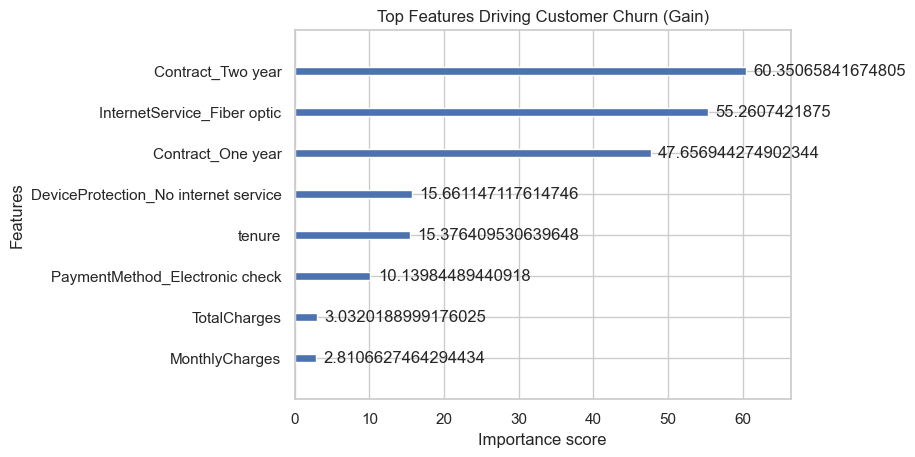

In [29]:
from xgboost import plot_importance

# Plot feature importance by gain
plt.figure(figsize=(10,6))
plot_importance(best_xgb, importance_type='gain', max_num_features=15)
plt.title("Top Features Driving Customer Churn (Gain)")
plt.show()